In [35]:
import torch, torchvision
from torchvision.datasets import MNIST
from torchvision import transforms
import torch.nn.functional as F

In [2]:
dataset = MNIST(root='data',train=True,download=True,transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 7442790.62it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 476437.62it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1018266.27it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3103702.96it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [13]:
len(dataset)

60000

In [15]:
test_data = MNIST(root='data', train=False, transform=transforms.ToTensor())

In [16]:
len(test_data)

10000

In [4]:
from torch.utils.data import random_split

train_ds, val_da = random_split(dataset,[50000,10000])

In [58]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle= True)
val_loader = DataLoader(val_da, batch_size, shuffle= True)
test_loader = DataLoader(test_data, batch_size, shuffle= True)

In [29]:
import torch.nn as nn
input_size, hidden_size, num_clas= 784, 100, 10

In [45]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(input_size,hidden_size)
    self.linear2 = nn.Linear(hidden_size, num_clas)
  def forward(self,xb):
    xb = xb.reshape(-1,input_size)
    inter = self.linear1(xb)
    out = self.linear2(inter)
    return out

In [46]:
model = Model()

In [47]:
loss_fn = F.cross_entropy
optimiser= torch.optim.SGD(model.parameters(), lr=0.001)

In [41]:
def correct(outputs, labels):
  _, preds= torch.max(outputs, dim=1)
  return torch.sum(preds==labels).item()

def evaluate(model, val_loader):
  sum = 0
  for batch in val_loader:
    xb, labels = batch
    outputs= model(xb)
    sum= sum + correct(outputs,labels)

  return sum

In [48]:
correct_pred = evaluate(model, test_loader)
print("accuracy:", correct_pred/10000)

accuracy: 0.0449


In [49]:
num_epochs= 3

for epoch in range(num_epochs):
  for batch in train_loader:
    xb, labels = batch
    outputs= model(xb)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimiser.step()
    optimiser.zero_grad
  correct_preds = evaluate(model, val_loader)
  print("epoch:", epoch, "val_accuracy:", correct_preds/10000)

epoch: 0 val_accuracy: 0.8736
epoch: 1 val_accuracy: 0.8529
epoch: 2 val_accuracy: 0.8624


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
def show(img,pred,label):
  img = img.reshape(28,28,-1)
  plt.imshow(img,cmap="gray")
  print("Label:",label,"Prediction:",pred)

In [66]:
for batch in test_loader:
    xb, labels = batch
    outputs= model(xb)
    _, preds= torch.max(outputs, dim=1)
    wrong_preds_img = xb[preds!=labels]
    wrong_preds_pred = preds[preds!=labels]
    wrong_preds_labels = labels[preds!=labels]
    break


Label: tensor(3) Prediction: tensor(2)


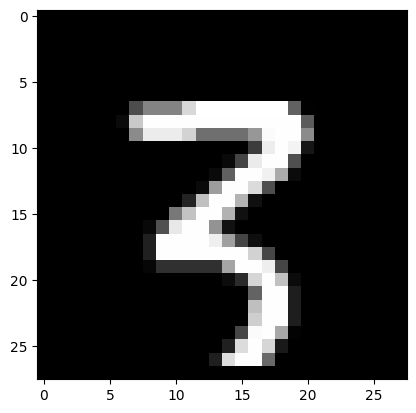

In [67]:
show(wrong_preds_img[0],wrong_preds_pred[0],wrong_preds_labels[0])

Label: tensor(9) Prediction: tensor(4)


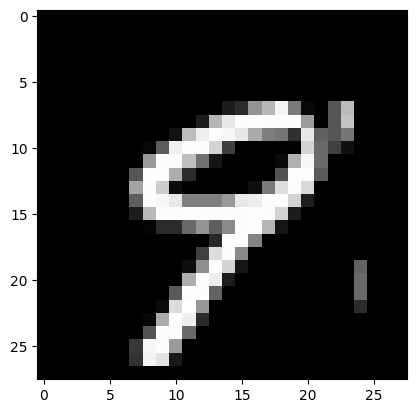

In [69]:
show(wrong_preds_img[1],wrong_preds_pred[1],wrong_preds_labels[1])

Label: tensor(6) Prediction: tensor(5)


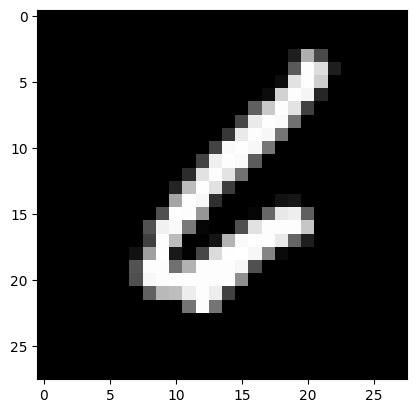

In [70]:
show(wrong_preds_img[2],wrong_preds_pred[2],wrong_preds_labels[2])